In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [9]:
titanic_data = pd.read_csv('D:data/titanic/train.csv')

In [10]:
# Проверяем на наличие пропущенных значений
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Отбираем данные для обучения и тестирования
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [12]:
# Переводим данные из строковых значений в числовые
X = pd.get_dummies(X)

In [13]:
# В пропущенных значениях столбца 'Age' указываем медианное значение по этому столбцу
X = X.fillna({'Age': X.Age.median()})

In [14]:
# Проверяем обучающие данные
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [27]:
# Выбираем и тренируем дерево
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [28]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [29]:
clf.score(X, y)

0.9797979797979798

[Text(0.6269602015398551, 0.975, 'X[5] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(0.40496206974637683, 0.925, 'X[4] <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(0.205078125, 0.875, 'X[1] <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(0.08152173913043478, 0.825, 'X[2] <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(0.07427536231884058, 0.775, 'X[3] <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(0.06702898550724638, 0.725, 'X[4] <= 15.015\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.059782608695652176, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07427536231884058, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08152173913043478, 0.725, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.08876811594202899, 0.775, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.32863451086956524, 0.825, 'X[7] <= 0.5\nentropy = 0.477\nsamples = 400\n

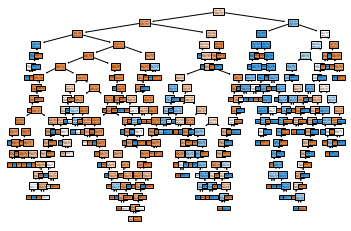

In [30]:
# Визуализируем полученное дерево чтобы оценить его размер
tree.plot_tree(clf, filled=True)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Разделяем данные на обучающие и тестирующие
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [33]:
# Выбираем и тренируем дерево уже с указанными параметрами
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [36]:
clf.score(X_train, y_train)

0.8406040268456376

In [37]:
clf.score(X_test, y_test)

0.8135593220338984

In [ ]:
# Создаем цикл для наглядного изучения зависимости точности дерева от его глубины

In [38]:
max_depth_values = range(1, 100)

In [39]:
scores_data = pd.DataFrame()

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [43]:
scores_data.head(7)

,max_depth,train_score,test_score,cross_val_score
0,1,0.798658,0.762712,0.798627
0,2,0.812081,0.752542,0.790224
0,3,0.840604,0.813559,0.813711
0,4,0.843960,0.803390,0.808683
0,5,0.870805,0.796610,0.807045
0,6,0.889262,0.783051,0.803697
0,7,0.901007,0.796610,0.808754


In [44]:
# Преобразуем таблицу scores_data для удобной визуализации на графике
scores_data_long = pd.melt(scores_data, id_vars='max_depth', value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')


In [45]:
scores_data_long.query("set_type == 'cross_val_score'").head()

,max_depth,set_type,score
198,1,cross_val_score,0.798627
199,2,cross_val_score,0.790224
200,3,cross_val_score,0.813711
201,4,cross_val_score,0.808683
202,5,cross_val_score,0.807045


<AxesSubplot:xlabel='max_depth', ylabel='score'>

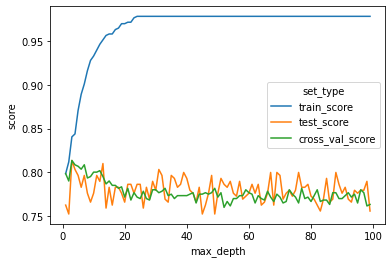

In [46]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [50]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.798627
199,2,cross_val_score,0.790224
200,3,cross_val_score,0.813711
201,4,cross_val_score,0.808683
202,5,cross_val_score,0.807045
203,6,cross_val_score,0.803697
204,7,cross_val_score,0.808754
205,8,cross_val_score,0.793669
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.800364


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# Указываем оптимальную глубину дерева
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [56]:
# Проверяем score дерева по КВ
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7864406779661017

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Ищем наилучшие параметры критерия и глубины для дерева используя КВ 

In [59]:
clf = tree.DecisionTreeClassifier()

In [60]:
parametrs = {'criterion': ["gini", "entropy"], 'max_depth': range(1, 30)}

In [61]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, )

In [62]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [63]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [64]:
best_clf = grid_search_cv_clf.best_estimator_

In [65]:
# Получили точность дерева с найденными параметрами
best_clf.score(X_test, y_test)

0.8033898305084746

In [67]:
# Смотрим Precision и Recall

In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
y_pred = best_clf.predict(X_test)

In [70]:
precision_score(y_test, y_pred)

0.8018867924528302

In [71]:
recall_score(y_test, y_pred)

0.6967213114754098

In [ ]:
# Обучаем дерево используя больше переменных у параметров

In [75]:
clf = tree.DecisionTreeClassifier()

In [76]:
parametrs={'max_depth': range(10, 20, 1), 'min_samples_split': range(10, 25, 1), 'min_samples_leaf': range(4, 10, 1)}

In [77]:
search = GridSearchCV(clf, parametrs, cv=5)

In [78]:
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(10, 20),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(10, 25)})

In [79]:
search.best_params_

{'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [80]:
best_clf = search.best_estimator_

In [81]:
import seaborn as sns

In [82]:
sns.set(rc={'figure.figsize': (35, 29)})

[Text(0.4386655011655012, 0.9666666666666667, 'X[6] <= 0.5\ngini = 0.466\nsamples = 596\nvalue = [376, 220]'),
 Text(0.23222610722610723, 0.9, 'X[0] <= 2.5\ngini = 0.375\nsamples = 200\nvalue = [50, 150]'),
 Text(0.13053613053613053, 0.8333333333333334, 'X[4] <= 149.035\ngini = 0.101\nsamples = 112\nvalue = [6, 106]'),
 Text(0.09324009324009325, 0.7666666666666667, 'X[4] <= 28.856\ngini = 0.075\nsamples = 102\nvalue = [4, 98]'),
 Text(0.07459207459207459, 0.7, 'X[1] <= 49.5\ngini = 0.153\nsamples = 48\nvalue = [4, 44]'),
 Text(0.055944055944055944, 0.6333333333333333, 'X[1] <= 26.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.037296037296037296, 0.5666666666666667, 'X[1] <= 23.5\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.018648018648018648, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.055944055944055944, 0.5, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.07459207459207459, 0.5666666666666667, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Te

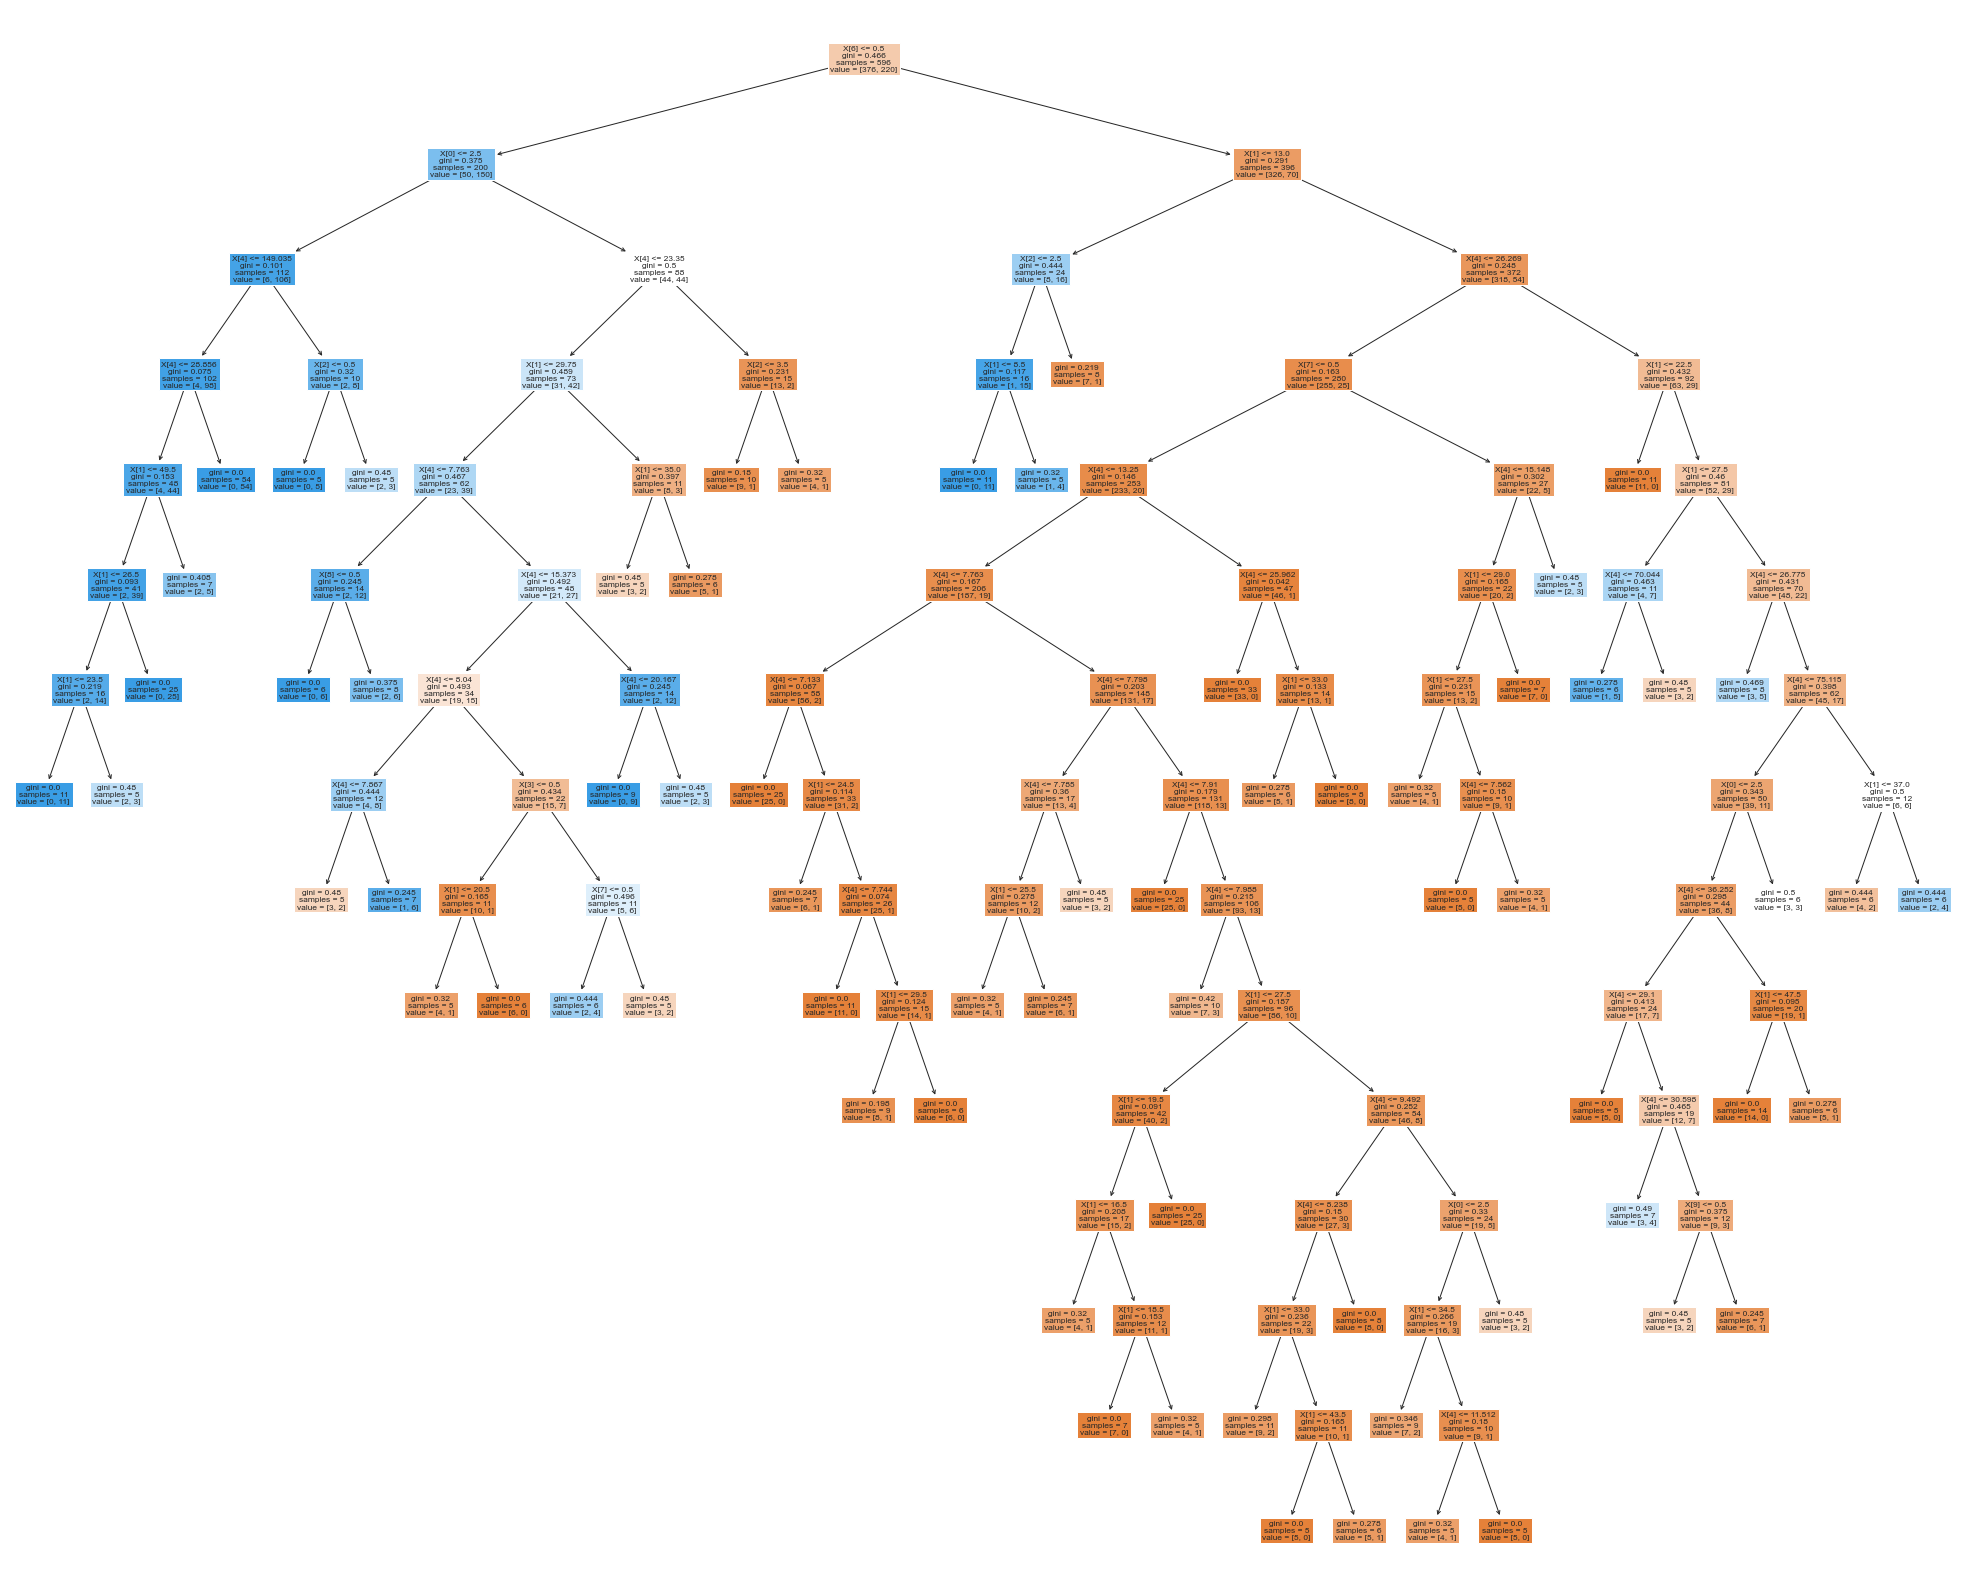

In [83]:
tree.plot_tree(best_clf, filled=True)

In [84]:
y_pred = best_clf.predict(X_test)

In [85]:
precision_score(y_test, y_pred)

0.7586206896551724

In [86]:
recall_score(y_test, y_pred)

0.7213114754098361